<a href="https://colab.research.google.com/github/NicoMyshkin/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

## Introduction to `pandas`

`pandas` is a package built on top of `numpy`. The core object of this package is the `DataFrame`, which are multidimensional datasets with row and column labels. In addition to offering an interface for tagged data, `pandas` also has powerful data manipulation functions.

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Installing `pandas`

Installation of `pandas` requires that you first have `numpy` installed. To install it, use the command:

```
# Installing using pip
pip install pandas

# Installing using conda
conda install pandas
```

In [115]:
# If you don't have pandas installed
!pip install pandas

After installation, you can import it. The version can be checked as follows:

In [116]:
# Import libraries
import pandas as pd
import numpy as np

In [117]:
# Pandas Version
pd.__version__

'1.1.5'

### `pandas` objects

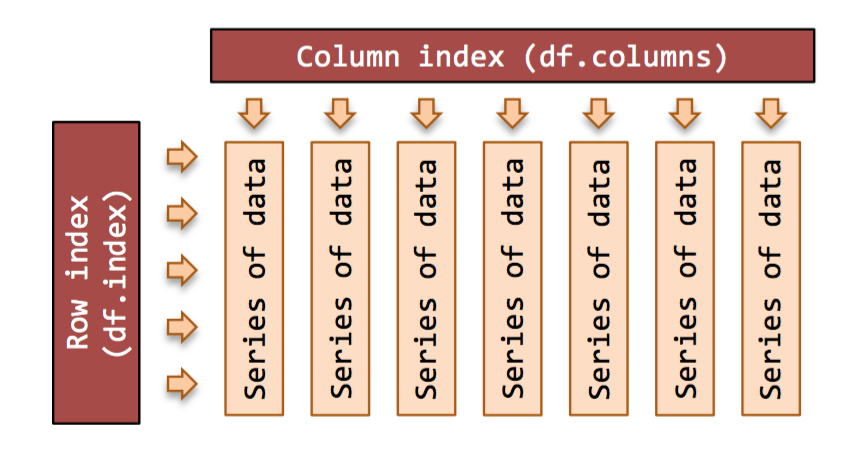

In [118]:
from IPython.display import Image
Image(filename='drive/MyDrive/DS4A/W1_bootcamp_pandas/base_01_pandas_5_0.png', width=500)
# Resource: https://bookdata.readthedocs.io/en/latest/base/01_pandas.html

Let's work with the famous [Titanic dataset](https://www.kaggle.com/c/titanic/data). Here are the available fields:

- `passengerId`: A numerical ID assigned to each passenger
- `survived`: Whether the passenger survived (1), or didn't (0)
- `pclass`: The class the passenger was in
- `name`: the name of the passenger
- `sex`: The gender of the passenger - male or female
- `Age`: The age of the passenger (includes fractional values)
- `sibsp`: The number of siblings and spouses the passenger had on board
- `parch`: The number of parents and children the passenger had on board
- `ticket`: The ticket number of the passenger
- `fare`: How much the passenger paid for the ticket
- `cabin`: Which cabin the passenger was in
- `embarked`: Where the passenger boarded the Titanic

In [119]:
# Load the file
titanic = pd.read_csv("drive/MyDrive/DS4A/W1_bootcamp_pandas/Datasets/train.csv")

In [120]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [121]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [122]:
type(titanic.PassengerId)

pandas.core.series.Series

In [123]:
type(titanic)

pandas.core.frame.DataFrame

In [124]:
titanic.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

### Indexers: `loc` and `iloc`

Pandas provides some special *indexer* attributes that explicitly expose certain indexing schemes. These are not functional methods, but attributes that expose a particular way to retrieve slices of the data.

The ``loc`` attribute allows indexing and segmenting that always refers to the explicit index. The ``iloc`` attribute allows indexing and segmenting that always refers to the implicit Python-style index. To illustrate the difference, let's look at the examples below. Notice that `loc` is inclusive of both ends of specified ranges, and that columns are specified by name. On the other hand, `iloc` is exclusive of the upper end of specified ranges, and columns are specified by numerical index.

In [125]:
titanic.loc[10:15,'PassengerId':'Age']

,PassengerId,Survived,Pclass,Name,Sex,Age
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0


In [126]:
titanic.iloc[10:15,0:5]

,PassengerId,Survived,Pclass,Name,Sex
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female
11,12,1,1,"Bonnell, Miss. Elizabeth",female
12,13,0,3,"Saundercock, Mr. William Henry",male
13,14,0,3,"Andersson, Mr. Anders Johan",male
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female


### Data selection

Now that we know a bit about how `pandas` indexes data, we can look at how to exrtract it. `pandas` has a number of ways for selecting subsets of a dataset:

In [127]:
# slicing by implicit index
titanic[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [128]:
# fancy indexing
titanic[['PassengerId','Age']][10:15]

,PassengerId,Age
10,11,4.0
11,12,58.0
12,13,20.0
13,14,39.0
14,15,14.0


In [129]:
# masking
titanic[(titanic.Age > 18) & (titanic['Age'] < 50)][10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C


In [130]:
titanic['Age'][10:15]

10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
Name: Age, dtype: float64

## Anatomy of a `DataFrame`

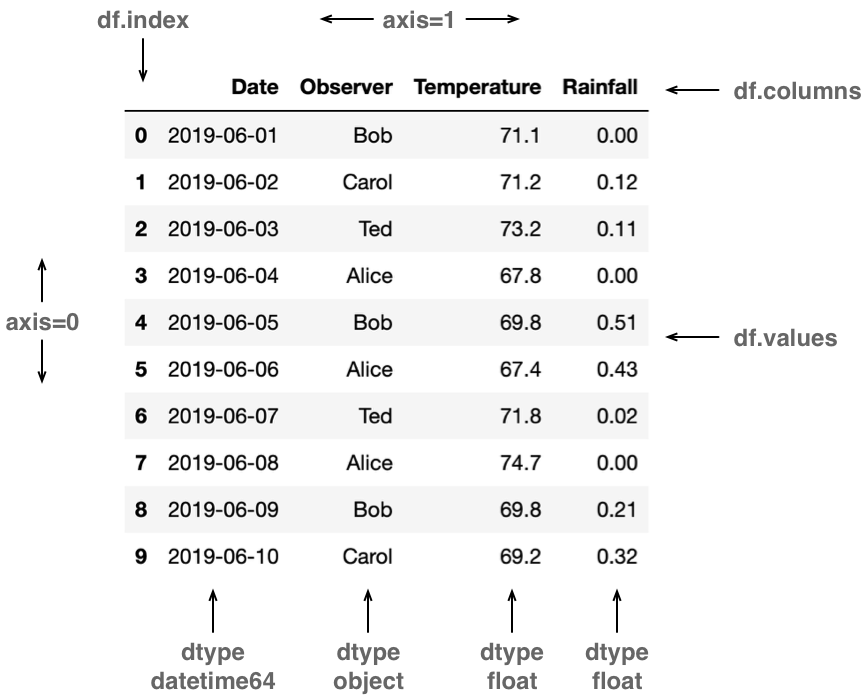

In [131]:
from IPython.display import Image
Image(filename='drive/MyDrive/DS4A/W1_bootcamp_pandas/AnatomyDataFrame.png', width=500)
#Resource: https://cvw.cac.cornell.edu/PyDataSci1/arrays_dataframes

### `concat()`

`pandas` has a function, ``pd.concat()``, which has a syntax similar to ``np.concatenate`` but contains different arguments. It can be used for a simple concatenation of ``Series`` or ``DataFrames``:

In [132]:
df1 = titanic[(titanic.Age > 18) & (titanic['Age'] < 50)][10:15][['PassengerId','Survived']]
df1.reset_index(inplace = True)
#df1

In [133]:
df2 = titanic.iloc[10:15,2:5]
df2.reset_index(inplace = True)
#df2

In [134]:
pd.concat([df1, df2],sort=True, axis=1)

,index,PassengerId,Survived,index,Pclass,Name,Sex
0,21,22,1,10,3,"Sandstrom, Miss. Marguerite Rut",female
1,23,24,1,11,1,"Bonnell, Miss. Elizabeth",female
2,25,26,1,12,3,"Saundercock, Mr. William Henry",male
3,27,28,0,13,3,"Andersson, Mr. Anders Johan",male
4,30,31,0,14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female


In [135]:
pd.concat([df1, df2],ignore_index=True,sort=True, axis=0)

,Name,PassengerId,Pclass,Sex,Survived,index
0,NaN,22.0,NaN,NaN,1.0,21
1,NaN,24.0,NaN,NaN,1.0,23
2,NaN,26.0,NaN,NaN,1.0,25
3,NaN,28.0,NaN,NaN,0.0,27
4,NaN,31.0,NaN,NaN,0.0,30
5,"Sandstrom, Miss. Marguerite Rut",NaN,3.0,female,NaN,10
6,"Bonnell, Miss. Elizabeth",NaN,1.0,female,NaN,11
7,"Saundercock, Mr. William Henry",NaN,3.0,male,NaN,12
8,"Andersson, Mr. Anders Johan",NaN,3.0,male,NaN,13
9,"Vestrom, Miss. Hulda Amanda Adolfina",NaN,3.0,female,NaN,14


### `merge()` and `join()`

These functions allow data from different dataframes to be combined into one according to a "crossover" or "search" rule.

The `merge()` function is the default `pandas` function for merging data. It's basically `pandas`' counterpart of SQL JOINs, and requires specifying which columns of both DataFrames will be compared. `merge()` doesn't care at all about the indices defined on them.

On the other hand, `join()` is basically doing a merge but taking advantage of the indices of both DataFrames.

The following figure summarizes the different 4 types of JOINs: _inner, outer, left and right_.

![MERGE](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)

The `merge()` function is also available as a method in the `DataFrame` class. The basic syntax is:

```
new_joined_df = df.merge (another_df, left_on = "col_in_df", right_on = "col_in_another_df",
                          how="inner"|"left"|"right"|"outer")
```

The first argument (`another_df`), as well as `left_on` and `right_on` are required arguments. `left_on` specifies a column name in `df` whose values must match those in column `another_df` 'specified in `right_on`. The `how` argument is optional and defaults to `inner`.

In [136]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')

In [137]:
pd.merge(staff_df, student_df,left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [138]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [139]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [140]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [141]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

In [142]:
pd.merge(staff_df, student_df, how="left", left_on="Name", right_on="Name")

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [143]:
pd.merge(staff_df, student_df, how="left",on="Name")

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [144]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])

In [145]:
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])

In [146]:
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


## Aggregation and grouping

An essential part of analyzing lots of data is creating efficient summaries of it. Computational aggregations, such as ``sum()``, ``mean()``, ``median()``, ``min()`` and ``max()``, allow us to use relatively few numbers to give us an idea of the nature of a potentially large dataset.

In this section, we will explore aggregations in `pandas`, from simple operations similar to what we have seen in `numpy` arrays, to more sophisticated operations based on the concept of `groupby()`.

In [147]:
titanic['Age'].mean()

29.69911764705882

In [148]:
titanic.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [149]:
titanic.groupby('Sex').agg({'Age':['min','mean','max']})

Age                 
         min       mean   max
Sex                          
female  0.75  27.915709  63.0
male    0.42  30.726645  80.0

### `crosstab()`

One of the useful functions in `pandas` is `crosstab()`. This allows us to segregate our data into buckets using the classes of a few categorical variables, then construct a table showing the number of data points in each bucket:

In [150]:
pd.crosstab(titanic['Sex'], titanic['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


### Pivot tables

These are just like the pivot tables in Excel. Here, we use it to look at the average age of passengers, segregated by class and gender:

In [151]:
titanic.pivot_table(values='Age',index='Sex',columns='Pclass', aggfunc=np.mean)

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


### A little bit about dates in `pandas`

`pandas` has some functionaliy for working with dates as well:

In [152]:
import seaborn as sns

# Load dataset
flights = sns.load_dataset('flights')
flights.head(2)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118


In [153]:
flights['date'] = flights['year'].astype(str)+ ' ' + flights['month'].astype(str)
flights.head(2)

,year,month,passengers,date
0,1949,Jan,112,1949 Jan
1,1949,Feb,118,1949 Feb


In [154]:
flights['date'] = pd.to_datetime(flights['date'])
flights.head(2)

,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01


In [155]:
flights.set_index('date',inplace=True)

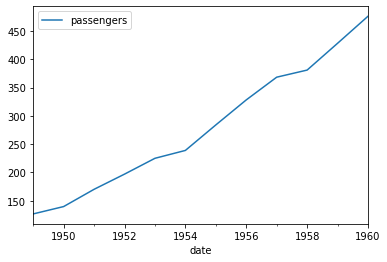

In [156]:
flights.groupby(pd.Grouper(freq='Y')).agg({'passengers':'mean'}).plot()

In [157]:
flights.resample('y').mean()

,year,passengers
date,,
1949-12-31,1949.0,126.666667
1950-12-31,1950.0,139.666667
1951-12-31,1951.0,170.166667
1952-12-31,1952.0,197.000000
1953-12-31,1953.0,225.000000
1954-12-31,1954.0,238.916667
1955-12-31,1955.0,284.000000
1956-12-31,1956.0,328.250000
1957-12-31,1957.0,368.416667


In [158]:
flights.resample('y').mean()['passengers'].diff(2)

date
1949-12-31          NaN
1950-12-31          NaN
1951-12-31    43.500000
1952-12-31    57.333333
1953-12-31    54.833333
1954-12-31    41.916667
1955-12-31    59.000000
1956-12-31    89.333333
1957-12-31    84.416667
1958-12-31    52.750000
1959-12-31    59.916667
1960-12-31    95.166667
Freq: A-DEC, Name: passengers, dtype: float64

In [159]:
flights['1950-12-31':].head()

,year,month,passengers
date,,,
1951-01-01,1951,Jan,145
1951-02-01,1951,Feb,150
1951-03-01,1951,Mar,178
1951-04-01,1951,Apr,163
1951-05-01,1951,May,172


## Exploring the data

As we go through the dataset, knowing some functions that `pandas` provide us to make our lives easier is crucial. Here, we want to identify the types of data in our dataset, if we have nulls in our dataset, etc. Some functions that can help us for this include:

```python
df.head()
df.tail()
df.info()
df.shape
df.columns
df.describe()
df.value_counts()
df.unique()
df.nunique()
```

In [160]:
# See first two rows
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [161]:
# See last two rows
titanic.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [162]:
# How many rows and columns in dataset
titanic.shape

(891, 12)

In [163]:
# Data types and amount of null values in dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
# Another way to see null values per column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [165]:
# Another way to see data types
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [166]:
# Information about numeric columns
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [167]:
# Information about categorical columns
titanic.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wick, Miss. Mary Natalie",male,1601,G6,S
freq,1,577,7,4,644


In [168]:
# Unique values per column excluding null
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [169]:
# Unique values per column including null
titanic.nunique(dropna=False)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [170]:
# Counting
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [171]:
# Most frequent value in the series
titanic['Embarked'].mode()

# Unique values of the column 'Embarked'
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [172]:
# How many records do we have by category of the column 'Embarked' without null values
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [173]:
# How many records do we have by category of the column 'Embarked' with null values
titanic['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [174]:
# Names of the columns in the dataset
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [175]:
titanic.columns = ['Passenger_Id', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
titanic = titanic.rename(columns={'Passenger_Id':'PassengerId'})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [176]:
?titanic.rename

In [177]:
titanic[(titanic['Embarked']=='S') & (titanic['Sex']=='female')][['Name','Age']].head()

,Name,Age
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0
10,"Sandstrom, Miss. Marguerite Rut",4.0
11,"Bonnell, Miss. Elizabeth",58.0


### Exercise 1:

Using the `sex`, `Age`, and `fare` columns, answer the following questions:

1. How many Men and Women do we have in our dataset?
2. What is the most frequent age in our dataset?
3. What is the most common age for women?
4. What is the most common age for men?
5. What is the most common ticket price?
6. Is the price of the most common ticket the same for men and women?

In [178]:
# How many Men and Women do we have in our dataset?
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

This is what you should get for #1:

```
male      577
female    314
Name: Sex, dtype: int64
```

In [179]:
# What is the most frequent age in our dataset?
titanic.Age.mode()

0    24.0
dtype: float64

This is what you should get for #2:

```
0    24.0
dtype: float64
```

In [180]:
# What is the most common age for women?
titanic[(titanic['Sex']=='female')].Age.mode()

0    24.0
dtype: float64

This is what you should get for #3:

```
0    24.0
dtype: float64
```

In [181]:
# What is the most common age for men?
titanic[(titanic['Sex']=='male')].Age.mode()

0    19.0
1    25.0
2    28.0
dtype: float64

This is what you should get for #4:

```
0    19.0
1    25.0
2    28.0
dtype: float64
```

In [182]:
# What is the most common ticket price?
titanic.Fare.mode()

0    8.05
dtype: float64

This is what you should get for #5:

```
0    8.05
dtype: float64
```

Double-click __Here__ to see the solution.

<!-- Your answer is below:
titanic['Fare'].mode()
-->

In [183]:
# Is the price of the most common ticket the same for men and women?
male_fare = str(titanic[(titanic['Sex']=='male')].Fare.mode())
female_fare = str(titanic[(titanic['Sex']=='female')].Fare.mode())

print("Common ticket price for women :" + female_fare)
print("Common ticket price for men :" + male_fare)

Common ticket price for women :0    7.75
dtype: float64
Common ticket price for men :0    8.05
dtype: float64


This is what you should get for #6:

```
Common ticket price for women :7.75
Common ticket price for men :8.05
```

## Pre-processing our data

Now that we have an idea of what our dataset consists of, let's transform it so that we can display phase. The types of activities we may engage in during **pre-processing** include:

1. **Deleting columns**
2. **Enriching (or Transforming)** a data set, adding newly calculated columns in the indices
3. **Filtering** a subset of the rows or columns of a dataset according to some criteria
4. **Indexing** a dataset
5. **Aggregating** data
6. **Sorting** the rows of a data set according to some criteria
7. **Merging** the data
8. **Pivoting** so that data that was originally laid out vertically is laid out horizontally (increasing the number of columns) or vice versa (increasing the number of rows)

among others.

In [184]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [185]:
# Delete columns PassengerId, Name, Cabin, we are not going to delete the ticket column yet.
titanic.drop(['PassengerId','Name','Cabin'],axis=1, inplace=True)
titanic.shape

(891, 9)

In [186]:
# Null validation again
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [187]:
# In the first 10 records we have a null age field, we are going to have it as a reference for what we are going to do
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
5,0,3,male,NaN,0,0,330877,8.4583,Q
6,0,1,male,54.0,0,0,17463,51.8625,S
7,0,3,male,2.0,3,1,349909,21.0750,S
8,1,3,female,27.0,0,2,347742,11.1333,S
9,1,2,female,14.0,1,0,237736,30.0708,C


### Null values

Depending on the problem, the treatment of nulls can be handled in different ways:

* Keep them
* Delete them
* Leave a fixed value that differentiates them
* Replace them with a summary statistic (mean, median, mode)
* Forward or backward fill
* Interpolate

You will learn about when to do each in a later case.

In [188]:
# Delete
titanic.dropna(inplace=True)
titanic.shape

(712, 9)

In [189]:
# Null validation
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [190]:
# In the first 10 records we have a null age field, we are going to have it as a reference for what we are going to do
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
6,0,1,male,54.0,0,0,17463,51.8625,S
7,0,3,male,2.0,3,1,349909,21.0750,S
8,1,3,female,27.0,0,2,347742,11.1333,S
9,1,2,female,14.0,1,0,237736,30.0708,C
10,1,3,female,4.0,1,1,PP 9549,16.7000,S


In [191]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Ticket    712 non-null    object 
 7   Fare      712 non-null    float64
 8   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 55.6+ KB


In [192]:
titanic.reset_index(drop=True,inplace=True)
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
5,0,1,male,54.0,0,0,17463,51.8625,S
6,0,3,male,2.0,3,1,349909,21.0750,S
7,1,3,female,27.0,0,2,347742,11.1333,S
8,1,2,female,14.0,1,0,237736,30.0708,C
9,1,3,female,4.0,1,1,PP 9549,16.7000,S


In [195]:
# Leave a fixed value that differentiates them
titanic = pd.read_csv("drive/MyDrive/DS4A/W1_bootcamp_pandas/Datasets/train.csv")
titanic.drop(['PassengerId','Name','Cabin'],axis=1, inplace=True)

In [196]:
titanic.shape

(891, 9)

In [197]:
titanic.fillna(-1).head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
5,0,3,male,-1.0,0,0,330877,8.4583,Q
6,0,1,male,54.0,0,0,17463,51.8625,S
7,0,3,male,2.0,3,1,349909,21.0750,S
8,1,3,female,27.0,0,2,347742,11.1333,S
9,1,2,female,14.0,1,0,237736,30.0708,C


In [198]:
titanic['Age'].fillna(titanic['Age'].mean()).head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [199]:
titanic['Age'].fillna(titanic['Age'].median()).head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [200]:
titanic['Age'].fillna(titanic['Age'].mode()[0]).head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    24.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [201]:
titanic['Age'].fillna(method='backfill').head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    54.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [202]:
titanic['Age'].fillna(method='ffill').head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    35.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [203]:
titanic['Age'].interpolate(method='polynomial', order=2).head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    56.320363
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

For our exercise we will make the decision to drop the nulls.

In [204]:
# Drop nulls
titanic.dropna(inplace=True)
titanic.shape

(712, 9)

### Column renaming

To be practical, we normally modify the names of the columns in order to remove blank spaces and special characters, and to convert uppercase to lowercase:

In [205]:
# Rename columns to lowercase
titanic.rename(columns = lambda col: col.lower(),inplace=True)

In [206]:
# Validate dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   ticket    712 non-null    object 
 7   fare      712 non-null    float64
 8   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 55.6+ KB


In [207]:
titanic.shape

(712, 9)

### Indexing

In [208]:
# After eliminating the nulls, the indexes must be reset, as you can see they still appear from 0 to 890 
# even though we have 712 rows.
titanic.reset_index(drop=True,inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   ticket    712 non-null    object 
 7   fare      712 non-null    float64
 8   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 50.2+ KB


### Grouping

In [209]:
titanic.groupby(['sex','survived']).size()

sex     survived
female  0            64
        1           195
male    0           360
        1            93
dtype: int64

In [210]:
titanic.groupby(['sex','survived']).agg({'fare':'count','age':'mean'}).reset_index()

,sex,survived,fare,age
0,female,0,64,25.046875
1,female,1,195,28.630769
2,male,0,360,31.618056
3,male,1,93,27.276022


In [211]:
# Validate duplicate tickets
df_tickets = titanic.groupby('ticket').size().reset_index().rename(columns={0:'count'})
df_tickets.sort_values(by='count',ascending=False)

,ticket,count
273,347082,7
445,CA 2144,6
207,3101295,6
277,347088,6
490,S.O.C. 14879,5
...,...,...
242,345763,1
241,345572,1
240,345364,1
239,343276,1


In [212]:
titanic[titanic['ticket']=='347082']

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked
12,0,3,male,39.0,1,5,347082,31.275,S
93,0,3,female,2.0,4,2,347082,31.275,S
428,0,3,female,9.0,4,2,347082,31.275,S
429,0,3,female,11.0,4,2,347082,31.275,S
481,0,3,female,39.0,1,5,347082,31.275,S
649,0,3,female,6.0,4,2,347082,31.275,S
676,0,3,male,4.0,4,2,347082,31.275,S


In [213]:
titanic[titanic['ticket']=='110413']

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked
210,0,1,male,52.0,1,1,110413,79.65,S
442,1,1,female,39.0,1,1,110413,79.65,S
462,1,1,female,18.0,0,2,110413,79.65,S


### Ordering

In [214]:
# Sort the number of records by tickets
df_tickets.sort_values(by=["count"],ascending=False,inplace=True)
df_tickets.head()

,ticket,count
273,347082,7
445,CA 2144,6
207,3101295,6
277,347088,6
490,S.O.C. 14879,5


In [215]:
# Let's validate a ticket
titanic[titanic['ticket']=='347082']

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked
12,0,3,male,39.0,1,5,347082,31.275,S
93,0,3,female,2.0,4,2,347082,31.275,S
428,0,3,female,9.0,4,2,347082,31.275,S
429,0,3,female,11.0,4,2,347082,31.275,S
481,0,3,female,39.0,1,5,347082,31.275,S
649,0,3,female,6.0,4,2,347082,31.275,S
676,0,3,male,4.0,4,2,347082,31.275,S


### Merging datasets

In [216]:
# First we will add the column 'count' from df_tickets to our titanic dataset
titanic = titanic.merge(df_tickets,left_on='ticket',right_on='ticket',how='left')
titanic.shape

(712, 10)

In [217]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked,count
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,1,1,female,35.0,1,0,113803,53.1000,S,2
4,0,3,male,35.0,0,0,373450,8.0500,S,1


### Enrich dataset

We will **enrich** this dataset by creating a new column `family`, which will be "1" if the trip was taken with others, and "0" if they traveled alone:

In [218]:
titanic['family'] = [1 if count>1 else 0 for count in titanic['count']]

In [219]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked,count,family
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,1,1,female,35.0,1,0,113803,53.1000,S,2,1
4,0,3,male,35.0,0,0,373450,8.0500,S,1,0


### Cleaning text

In [220]:
# Remember the functions? we are going to create a function that will help us to clean text, in this case the tickets field
def clean_text(string):
    import re
    regex = '[^A-Za-z0-9]+'
    return re.sub(regex, '', string)

In [221]:
titanic['ticket'] = titanic['ticket'].apply(clean_text)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked,count,family
0,0,3,male,22.0,1,0,A521171,7.2500,S,1,0
1,1,1,female,38.0,1,0,PC17599,71.2833,C,1,0
2,1,3,female,26.0,0,0,STONO23101282,7.9250,S,1,0
3,1,1,female,35.0,1,0,113803,53.1000,S,2,1
4,0,3,male,35.0,0,0,373450,8.0500,S,1,0


In [222]:
# To continue we will delete the ticket column
titanic.drop('ticket',axis=1,inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,count,family
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,1
4,0,3,male,35.0,0,0,8.0500,S,1,0


### Encoding categorical variables

Sometimes, it is helpful to create a column for each possible category of one of our categorical variables. For this, we use a `pandas` method called `get_dummies()`:

In [223]:
titanic['sexDummies'] = titanic['sex']
titanic = pd.get_dummies(titanic, columns = ['sexDummies'], prefix = ['D'])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,count,family,D_female,D_male
0,0,3,male,22.0,1,0,7.2500,S,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,1,1,0
4,0,3,male,35.0,0,0,8.0500,S,1,0,0,1


### Exercise 2:

1. Group the data set by gender (`sex`) and calculate the average age (`age`).
2. Group the data set by the family column (`family`) and count the number of records per group.
3. Of the families, how many survived and how many did not?

In [224]:
# Group the data set by gender (sex) and calculate the average age (age)


This is what you should get for #1:


|_|sex| age | 
|-----|-----|-----|
|0|	female|	27.915709|
|1|male|30.726645|

Double-click __Here__ to see the solution.

<!-- Your answer is below:
titanic.groupby('sex').agg({'age':'mean'}).reset_index()
-->

In [225]:
# Group the data set by the family column (family) and count the number of records per group.

This is what you should get for #2:

|_|family| count | 
|-----|-----|-----|
|0|	0|	547|
|1|1|344|

Double-click __Here__ to see the solution.

<!-- Your answer is below:
titanic.groupby(['family']).size().reset_index().rename(columns={0:'count'})
-->

In [226]:
# Of the families, how many survived and how many did not?

This is what you should get for #3:

|_|family| survived | count |
|-----|-----|-----|-----|
|0|	0|	0| 384|
|1|	0|	1| 163|
|2|	1|	0| 165|
|3|	1|	1| 179|

Double-click __Here__ to see the solution.

<!-- Your answer is below:
titanic.groupby(['family','survived']).size().reset_index().rename(columns={0:'count'})
-->

## Data visualizations

To conduct descriptive analysis of our data, we make use of various graphs to gather more information that we will use later on in the data science process when building our models. It is essential to have knowledge of the Python libraries that allow us to generate these visualizations, such as `matplotlib` and `seaborn`. `pandas` also has a few visualization methods.

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,count,family,D_female,D_male
0,0,3,male,22.0,1,0,7.2500,S,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,1,0
3,1,1,female,35.0,1,0,53.1000,S,2,1,1,0
4,0,3,male,35.0,0,0,8.0500,S,1,0,0,1


### Line chart

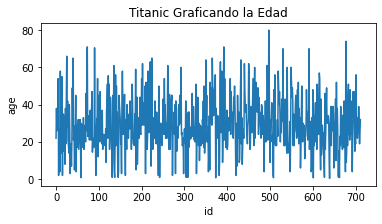

In [228]:
# Let's start with a simple graph, by not placing X it is assumed that x is each of the records.
plt.figure(figsize=(6,3))
plt.plot(titanic['age'])
plt.title('Titanic Graficando la Edad')
plt.xlabel('id')
plt.ylabel('age')
plt.show()

In [229]:
?plt

### Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


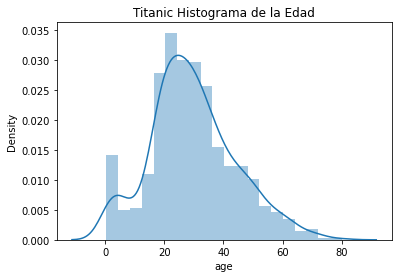

In [230]:
plt.figure(figsize=(6,4))
sns.distplot(titanic['age'])
plt.title('Titanic Histograma de la Edad')
plt.show()

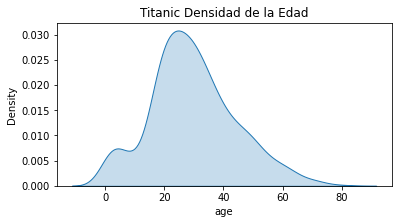

In [231]:
# If we only want the density function
plt.figure(figsize=(6,3))
sns.kdeplot(titanic['age'],shade=True)
plt.title('Titanic Densidad de la Edad')
plt.xlabel('age');

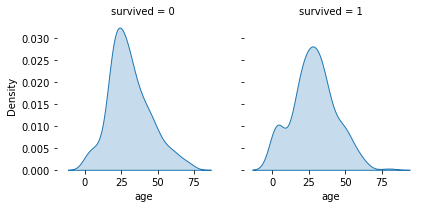

In [232]:
g = sns.FacetGrid(titanic, col="survived", height=3)
g.map(sns.kdeplot, 'age', shade=True)
g.despine(left=True,bottom=True);

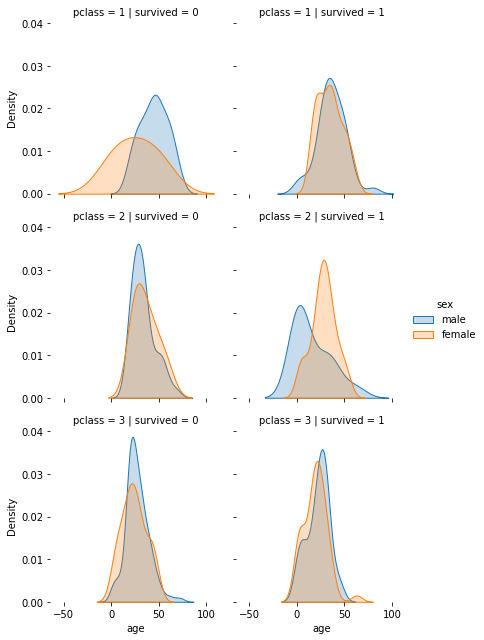

In [233]:
g = sns.FacetGrid(titanic, col='survived', row='pclass', hue='sex', height=3)
g.map(sns.kdeplot, 'age', shade=True).add_legend()
g.despine(left=True, bottom=True)
plt.show()

### Boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


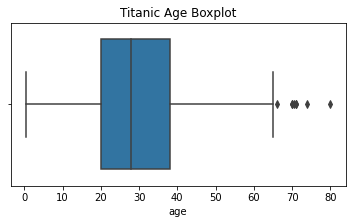

In [234]:
plt.figure(figsize=(6,3))
sns.boxplot(titanic['age'])#,orient='v')
plt.title('Titanic Age Boxplot')
plt.show()

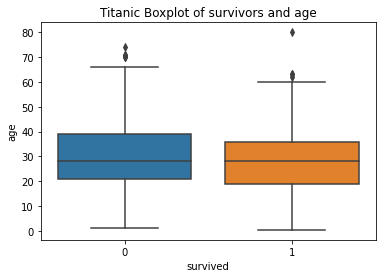

In [235]:
plt.figure(figsize=(6,4))
sns.boxplot(x='survived',y='age',data=titanic)
plt.title('Titanic Boxplot of survivors and age')
plt.show()

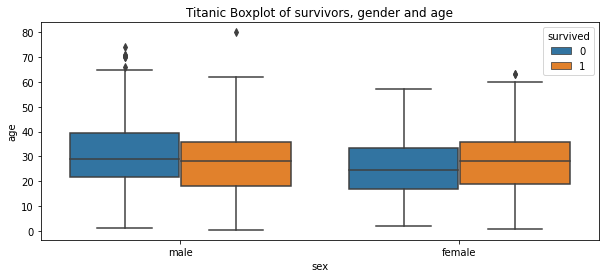

In [236]:
plt.figure(figsize=(10,4))
sns.boxplot(x='sex',y='age',hue='survived',data=titanic)
plt.title('Titanic Boxplot of survivors, gender and age')
plt.show()

### Bar chart

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


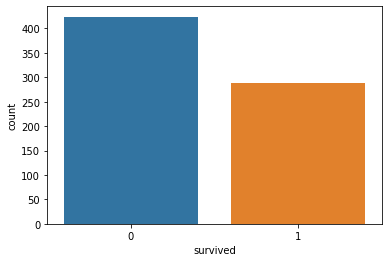

In [237]:
plt.figure(figsize=(6, 4))
sns.countplot('survived',data=titanic)
plt.show()

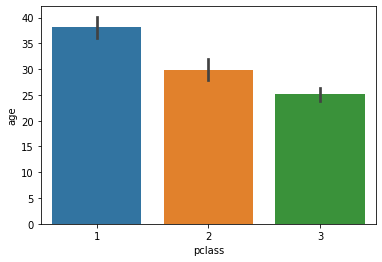

In [238]:
plt.figure(figsize=(6, 4))
sns.barplot(y='age',x='pclass',data=titanic)
plt.show()

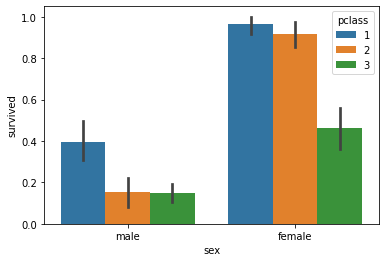

In [239]:
plt.figure(figsize=(6, 4))
sns.barplot(y='survived',x='sex',hue='pclass',data=titanic)
plt.show()

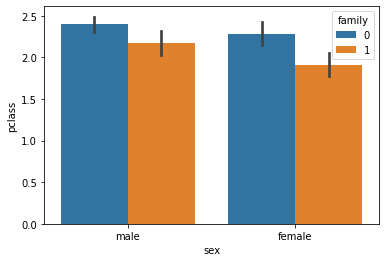

In [240]:
plt.figure(figsize=(6, 4))
sns.barplot(y='pclass',x='sex',hue='family',data=titanic)
plt.show()

### Heatmap

In [241]:
titanic.drop(['survived','family','D_female','D_male','count'],axis=1).corr()

,pclass,age,sibsp,parch,fare
pclass,1.000000,-0.365902,0.065187,0.023666,-0.552893
age,-0.365902,1.000000,-0.307351,-0.187896,0.093143
sibsp,0.065187,-0.307351,1.000000,0.383338,0.139860
parch,0.023666,-0.187896,0.383338,1.000000,0.206624
fare,-0.552893,0.093143,0.139860,0.206624,1.000000


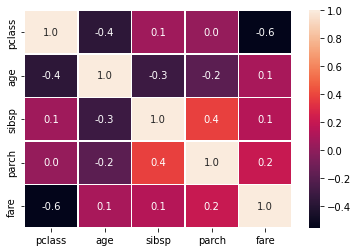

In [242]:
plt.figure()
sns.heatmap(titanic.drop(['survived','family','D_female','D_male','count'],axis=1).corr(),annot=True, linewidth=0.5,fmt='.1f')
plt.show()

### Scatterplot

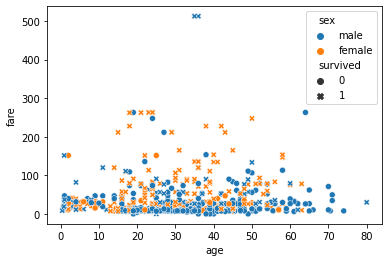

In [243]:
plt.figure()
sns.scatterplot(x='age', y='fare', hue='sex', style='survived', data=titanic)
plt.show()

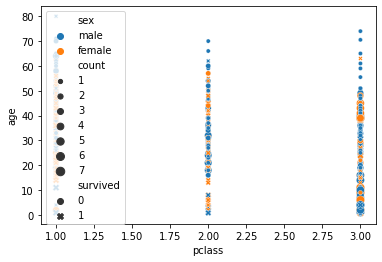

In [244]:
plt.figure()
sns.scatterplot(x='pclass', y='age', hue='sex', style='survived',size='count', data=titanic)
plt.legend(loc='upper left')
plt.show()

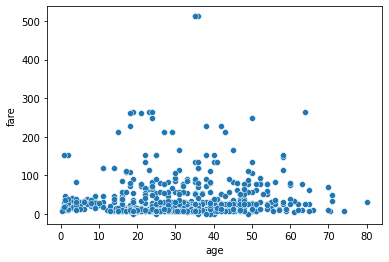

In [245]:
plt.figure()
sns.scatterplot(x='age', y='fare',data=titanic)
plt.show()

In [246]:
type(titanic.columns)

pandas.core.indexes.base.Index

In [247]:
for  col in titanic.columns:
    print(col)

survived
pclass
sex
age
sibsp
parch
fare
embarked
count
family
D_female
D_male


In [248]:
!pip install plotly

In [249]:
import plotly.express as px
fig = px.scatter(titanic,x='age',y='fare', color='sex',size='count')
fig.show()